# Lecture 15 LIVE (Fa22 Version)

We're going to catch up on Lectures 14 and 15 today.

## Understanding the ML Pipeline with the Wine Data Set

![Wine Glasses](wine-glasses.jpg)


## In-Class Demo

### D0: Understanding the Features of a Data Set

As a reminder, we can only study something via its representation in the computer. Typically we represent an object via its **features** there can be two main types of features/variables:
- categorical variables: color (red, green or blue); political party (democrat or republican); gender (male, female or non-binary), etc.
- numerical variables: height, weight, temperature, income, credit score, house price, etc.

**What features are there in the Wine Data Set? Run the code below!**

In [9]:
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()
print(wine.feature_names)
type(wine)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


sklearn.utils.Bunch

### D1: Dimensionality of Feature Space

- **How many features are there? What is the dimension of feature space here?**


### D2: Identifying the ML Task: Supervised versus Unsupervised Learning
- **Is this a good data set to do Supervised Learning on?**
- **If so, how many classes are there? What do they represent?**

https://archive.ics.uci.edu/ml/datasets/wine

In [2]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


### D3: Picking a Method and applying the Train-Model-Predict Paradigm
Below we're going to
1. Introduce the train-test split method
2. Apply the KNN Classifier
3. Predict class labels for the test data set
4. Toggle the value of k and use the "Elbow Method"

In [18]:
## import packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
  
## importing data
wine_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = wine_names) 
df = pd.DataFrame(wine_data)
  
## head of the data
#print(df.head())

## Separate Features from Class Values
wine_features = wine_names[1:]

X= df[wine_features]
y=df['Class']
  
## using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2, shuffle=True)

## Now apply KNN to our training data

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


print("Test set score: {:.2f}".format(classifier.score(X_test, y_test))) 

# below the values of the model 
from sklearn.metrics import classification_report
print("Final result of the model \n {}".format(classification_report(y_test, y_pred)))

Test set score: 0.81
Final result of the model 
               precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.92      0.79      0.85        14
           3       0.60      0.75      0.67         8

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.82      0.81      0.81        36



Text(0, 0.5, 'Error Rate')

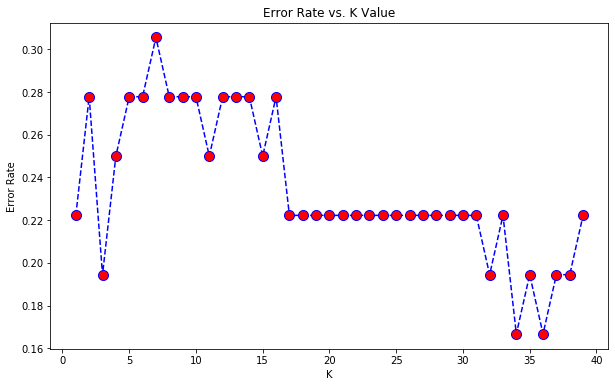

In [23]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color='blue',linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# In-Class Exercises
## Pandas and the Iris Data Set

### Question 1: Average Feature Size

Based on the plot below, you'll see the four features of the Iris data set appear to have different averages. In this question we will quantify this difference numerically.

Extract each of the three classes of Irises `Iris-setosa`, `Iris-versicolor` and `Iris-virginica` into 3 different data frames and compute the average of each of the four features.

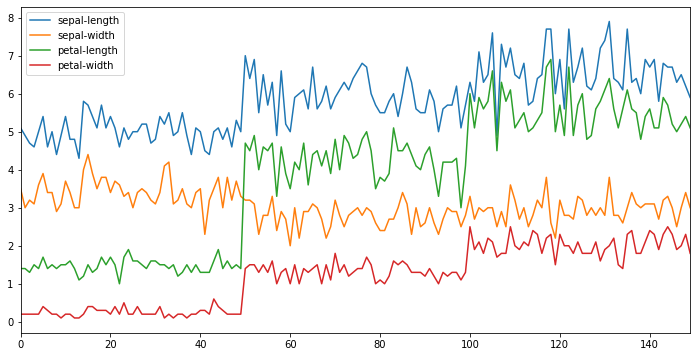

In [25]:
# Following https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
data = pd.read_csv(url, names=names)

# Plot the four features using a line graph
data.plot(kind = 'line',figsize = (12,6))

In [26]:
data

sepal-length  sepal-width  petal-length  petal-width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [29]:
setosa = data[data['Class'] == 'Iris-setosa']
setosa
print(setosa.mean())
print(setosa.std())

sepal-length    5.006
sepal-width     3.418
petal-length    1.464
petal-width     0.244
dtype: float64
sepal-length    0.352490
sepal-width     0.381024
petal-length    0.173511
petal-width     0.107210
dtype: float64


In [ ]:
## Now do this for the other two classes!

### Question 2: Statistics Concept Question

Based on your observations from Question 1, asses if any differences are statistically significant.

### Question 3: KNN

Perform the Elbow method on the Iris data set to find the best value of k!